In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

import sys
import math

from astropy.cosmology import Planck18 as cosmo
from astropy import units as u

arcmin = 2.908882086656e-4 # [rad] ... PI / 180 / 60 //
arcsec = 4.848136811094e-6 # [rad] ... arcmin / 60 //
dtheta=27

In [8]:
import astropy.cosmology
#from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

def arcsec_to_cMpc(l_arcsec, z):
    l_rad = l_arcsec * u.arcsec / u.radian
    l_cMpc = ( cosmo.comoving_transverse_distance(z) * l_rad ).to(u.Mpc)
    return l_cMpc.value 

def freq_to_comdis(nu_obs, nu_rest):
    z = nu_rest / nu_obs - 1
    if z < 0:
        print("Error: z < 0")
        sys.exit(1)
    return cosmo.comoving_distance(z).to(u.Mpc).value

def calc_LF(x, nbin=20, x_min=-1, x_max=3):
    num = np.zeros(nbin)
    x_bins = np.linspace(x_min, x_max, nbin+1)
    index = np.digitize(x, x_bins) - 1
    for ibin in range(nbin):
        mask = (index == ibin)
        num[ibin] = mask.sum()

    return x_bins, num


In [3]:
snapshot_id_z1 = 49 # z = 1.0
snapshot_id_z2 = 33 # z = 2.0

In [10]:
data = np.loadtxt(f"output_TNG300-1_model0/luminosity.{snapshot_id_z1}.txt")
sfr = data[:,7]
x_bins1, num1 = calc_LF(sfr)

data = np.loadtxt(f"output_TNG300-1_model0/luminosity.{snapshot_id_z2}.txt")
sfr = data[:,7]
x_bins2, num2 = calc_LF(sfr)

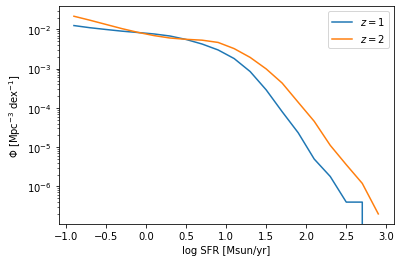

In [16]:
x_bin_values = 0.5 * (x_bins1[:-1] + x_bins1[1:])
dx = x_bins1[1:] - x_bins1[:-1]

boxsize = 205 / 0.7 #[Mpc]
factor = 1/boxsize**3 / dx

plt.figure()

plt.plot(x_bin_values, num1*factor, label=r"$z = 1$")
plt.plot(x_bin_values, num2*factor, label=r"$z = 2$")
plt.yscale("log")
plt.xlabel("log SFR [Msun/yr]")
plt.ylabel(r"$\Phi\ [\rm Mpc^{-3} \ dex^{-1}]$")
plt.legend()

In [24]:
print(f"# logSFR[Msun/yr] number_density[Mpc^-3 dex^-1]")
for i in range(len(num1)):
    print(f"{x_bin_values[i]:.2f} {(num2 * factor)[i]:e}")

# logSFR[Msun/yr] number_density[Mpc^-3 dex^-1]
-0.90 2.171101e-02
-0.70 1.719355e-02
-0.50 1.342797e-02
-0.30 1.048772e-02
-0.10 8.418209e-03
0.10 6.974763e-03
0.30 6.047900e-03
0.50 5.605570e-03
0.70 5.331851e-03
0.90 4.668953e-03
1.10 3.251386e-03
1.30 1.940321e-03
1.50 9.885742e-04
1.70 4.295898e-04
1.90 1.393479e-04
2.10 4.558669e-05
2.30 1.114784e-05
2.50 3.583233e-06
2.70 1.194411e-06
2.90 1.990685e-07
